In [ ]:
import os 

import xarray as xr
import matplotlib.pyplot as plt
import numpy as np

import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [ ]:
years = range(2005, 2015) # all years from 2005-2014 (10 year span)
directory_path = '/projects/lortizur/cop_climate/era5/' # for original data files

# create list of file names from directory by checking for year within range defined above
# file name looks like: 'directory_path+download_daily_maximum_2m_temperature_2005_01.nc'
# each file contains data from each day during that month within that year
files_list = [directory_path+f for f in os.listdir(directory_path) if int(f[-10:-6]) in years]

# open list of files as single dataset 
ds = xr.open_mfdataset(files_list)

# convert K to ºC
ds['t2m'] = (ds['t2m'] - 273.15).assign_attrs(units='degC')

# group data by month, calculate mean per month
ds_month_mean = ds.groupby('time.month').mean()

# save file with grouped mean calculation to disk to improve performance
ds_month_mean.to_netcdf('/home/alawyer2/era5-data/monthly-means.nc')

# access local mean file, save to variable
local_mean_file = xr.open_dataset('/home/alawyer2/era5-data/monthly-means.nc')

<xarray.Dataset> Size: 50MB
Dimensions:      (month: 12, lat: 721, lon: 1440)
Coordinates:
    realization  int64 8B ...
  * lat          (lat) float64 6kB -90.0 -89.75 -89.5 -89.25 ... 89.5 89.75 90.0
  * lon          (lon) float64 12kB -180.0 -179.8 -179.5 ... 179.2 179.5 179.8
  * month        (month) int64 96B 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    t2m          (month, lat, lon) float32 50MB ...
Attributes:
    Conventions:  CF-1.7
    institution:  European Centre for Medium-Range Weather Forecasts
    history:      2024-03-06T09:16 GRIB to CDM+CF via cfgrib-0.9.9.1/ecCodes-...
    source:       ECMWF

Text(0.5, 0.98, 'Average monthly temperature Cº (at 2m)')

<Figure size 1100x850 with 0 Axes>

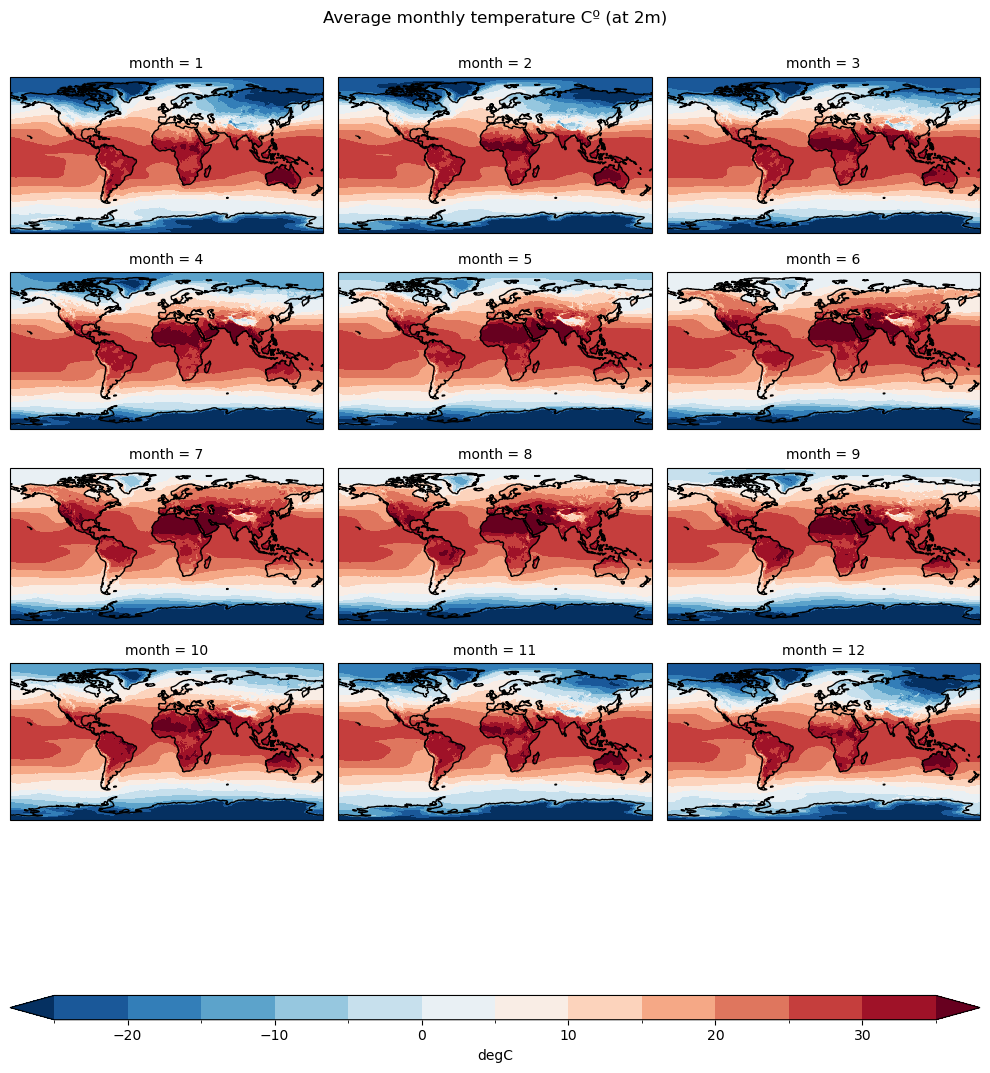

In [ ]:
fig = plt.figure(figsize=(11, 8.5))

clevs = np.arange(-25, 36, 5)

fg = local_mean_file['t2m'].plot.contourf(
    levels=clevs,
    row='month',
    col_wrap=3,
    robust=True,
    cmap='RdBu_r',
    extend='both',
    subplot_kws={"projection": ccrs.PlateCarree()},
    cbar_kwargs={
        "orientation": "horizontal",
        "shrink": 0.8,
        "aspect": 40,
        "label": "degC",
    },
)

for ax in fg.axs.flat:
    ax.coastlines()

plt.suptitle('Average monthly temperature Cº (at 2m)')